<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('heart.csv')

y = df['AGE_50'] # выбираем целевую переменную (количественная)
X = df.drop('AGE_50', axis=1) # переменные для проверки влияния

<pre>AGE_50 – Возраст человека.
MD_50 – Медицинский диагноз или индекс здоровья.
SBP_50 – Систолическое артериальное давление (systolic blood pressure) .
DBP_50 – Диастолическое артериальное давление (diastolic blood pressure).
HT_50 – Рост (height).
WT_50 – Вес (weight).
CHOL_50 – Уровень холестерина (cholesterol).
SES – Социально-экономический статус (socioeconomic status).
CL_STATUS – Клинический статус (возможно, индикатор состояния здоровья или наличия хронических заболеваний).
MD_62 – Медицинский диагноз или индекс здоровья.
SBP_62 – Систолическое артериальное давление.
DBP_62 – Диастолическое артериальное давление.
CHOL_62 – Уровень холестерина.
WT_62 – Вес.
IHD_DX – Диагноз ишемической болезни сердца (ischemic heart disease diagnosis).
DEATH – Индикатор смерти (возможно, "1" означает смерть, "0" — нет).</pre>

- **Непрерывные переменные:**
     - `AGE_50, SBP_50', DBP_50, HT_50, WT_50, SBP_62, DBP_62, CHOL_50, CHOL_62, WT_62`
   
- **Дискретные переменные:**
     - `MD_50, SES, CL_STATUS, MD_62, IHD_DX, DEATH`

In [2]:
X[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH']] = df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH']].astype({'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category'})
X[['SBP_50', 'DBP_50', 'WT_50', 'HT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62']] = df[['SBP_50', 'DBP_50', 'WT_50', 'HT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62']].astype({'SBP_50':'float64', 'DBP_50':'float64','WT_50':'float64', 'HT_50':'float64', 'CHOL_50':'float64', 'SBP_62':'float64', 'DBP_62':'float64', 'CHOL_62':'float64', 'WT_62':'float64'})

In [3]:
X
print(X.dtypes)

MD_50        category
SBP_50        float64
DBP_50        float64
HT_50         float64
WT_50         float64
CHOL_50       float64
SES          category
CL_STATUS    category
MD_62        category
SBP_62        float64
DBP_62        float64
CHOL_62       float64
WT_62         float64
IHD_DX       category
DEATH        category
dtype: object


Преобразование категориальных переменных остается без изменений

In [4]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X1 = pd.get_dummies(X, columns=category_columns,drop_first=True, dtype = bool)


In [5]:
# Выбираем числовые признаки
numeric_features = X1.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X1[numeric_features] = scaler.fit_transform(X1[numeric_features])

In [6]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
X1

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_2,MD_50_3,MD_50_4,SES_2,SES_3,SES_4,SES_5,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
2,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True
4,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
197,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_corr_test = X1.copy(deep = True)

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_2,MD_50_3,MD_50_4,SES_2,SES_3,SES_4,SES_5,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1,y
0,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,42
1,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,53
2,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,53
3,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,48
4,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,50
196,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,23
197,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20
198,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,46


In [8]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110.0,65.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,1
1,1,130.0,72.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,1
2,2,120.0,90.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,1
3,4,120.0,80.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,1
4,3,118.0,74.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115.0,80.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,0
196,1,110.0,70.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,0
197,3,130.0,80.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,0
198,3,140.0,84.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,0


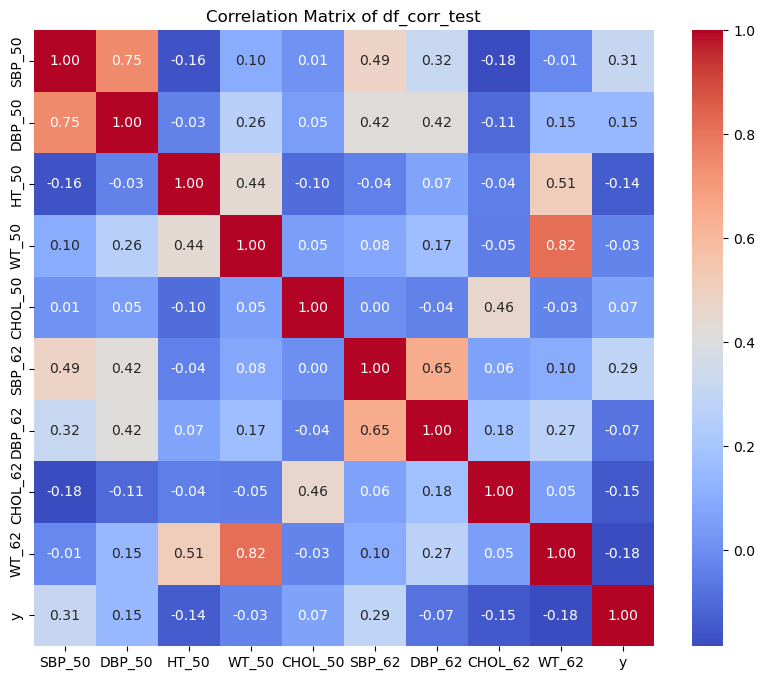

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


# 👽

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor #(◕_◕)
from sklearn.tree import DecisionTreeRegressor #(◕_◕)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge) 
    elif regularization == 'l3':
        """- neighbors: количество соседей, определяющее значение K."""
        neighbors = int(input("n_neighbors = "))
        model = KNeighborsRegressor(n_neighbors=neighbors) #(◕_◕)
    elif regularization == 'l4':
        """- neighbors: количество соседей, определяющее значение K
           - depth: максимальную глубину дерева
           - split: минимальное количество образцов, необходимых для разделения узла
           - leaf:  минимальное количество образцов, которые должны оставаться в листовом узле"""
        depth = int(input("max_depth = "))
        split = int(input("min_samples_split = "))
        leaf = int(input("min_samples_leaf = "))
        
        model = DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf) #(◕_◕)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

- max_depth:
    Определяет максимальную глубину дерева. Чем меньше значение, тем меньше вероятность переобучения, но тем более обобщенной будет модель.
    Стратегия подбора: Можно использовать случайный поиск или кросс-валидацию, чтобы определить оптимальную глубину.
- min_samples_split:
    Минимальное количество образцов, необходимых для разделения узла. Увеличение этого параметра может предотвратить создание излишне сложных моделей.
    Стратегия: Можно попробовать несколько значений, начиная с низкого (например, 2) и увеличивая до 10 или 20.
- min_samples_leaf:
    Минимальное количество образцов, которые должны оставаться в листовом узле. Это помогает сделать модель более устойчивой к шуму.
    Стратегия: Обычно значения от 1 до 10 — хорошее начало; можно исследовать также большие значения.

In [40]:
resolve_regression(X[['SBP_50', 'WT_62', 'CHOL_62']], y, 'l1')
None


Regularization: l1
Mean Absolute Error (MAE): 8.64
Mean Squared Error (MSE): 112.04
R^2 Score: -0.17


In [23]:
resolve_regression(X, y, 'l1')
None

Regularization: l1
Mean Absolute Error (MAE): 7.96
Mean Squared Error (MSE): 92.16
R^2 Score: 0.04


In [24]:
resolve_regression(X, y, 'l2')
None

Regularization: l2
Mean Absolute Error (MAE): 8.53
Mean Squared Error (MSE): 100.81
R^2 Score: -0.05


In [30]:
resolve_regression(X, y, 'l3') #(◕_◕)
None

n_neighbors = 5
Regularization: l3
Mean Absolute Error (MAE): 8.96
Mean Squared Error (MSE): 125.25
R^2 Score: -0.31


In [40]:
resolve_regression(X, y, 'l4') #(◕_◕)
None

max_depth = 1
min_samples_split = 10
min_samples_leaf = 10
Regularization: l4
Mean Absolute Error (MAE): 9.18
Mean Squared Error (MSE): 118.10
R^2 Score: -0.23


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MD_50      200 non-null    category
 1   SBP_50     200 non-null    float64 
 2   DBP_50     200 non-null    float64 
 3   HT_50      200 non-null    float64 
 4   WT_50      200 non-null    float64 
 5   CHOL_50    200 non-null    float64 
 6   SES        200 non-null    category
 7   CL_STATUS  200 non-null    category
 8   MD_62      200 non-null    category
 9   SBP_62     200 non-null    float64 
 10  DBP_62     200 non-null    float64 
 11  CHOL_62    200 non-null    float64 
 12  WT_62      200 non-null    float64 
 13  IHD_DX     200 non-null    category
 14  DEATH      200 non-null    category
dtypes: category(6), float64(9)
memory usage: 16.8 KB


Отбор признаков по корреляции

In [42]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [44]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X1, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X1, y, max_features=5)


In [45]:
X_selected_rfe

,SBP_50,SBP_62,DBP_62,CL_STATUS_6,CL_STATUS_8
0,0.180328,0.31250,0.318841,False,True
1,0.344262,0.32500,0.173913,True,False
2,0.262295,0.38750,0.492754,False,True
3,0.262295,0.30000,0.173913,False,True
4,0.245902,0.30000,0.000000,False,True
...,...,...,...,...,...
195,0.221311,0.28125,0.130435,False,True
196,0.180328,0.26250,0.289855,False,True
197,0.344262,0.37500,0.420290,False,False
198,0.426230,0.48750,0.463768,True,False


In [46]:
y_selected_rfe

0      42
1      53
2      53
3      48
4      53
       ..
195    50
196    23
197    20
198    46
199    36
Name: AGE_50, Length: 200, dtype: int64

In [47]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 9.13
Mean Squared Error (MSE): 116.64
R^2 Score: -0.22


In [48]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 7.92
Mean Squared Error (MSE): 99.63
R^2 Score: -0.04


Regularization: None
Mean Absolute Error (MAE): 7.92
Mean Squared Error (MSE): 99.63
R^2 Score: -0.04


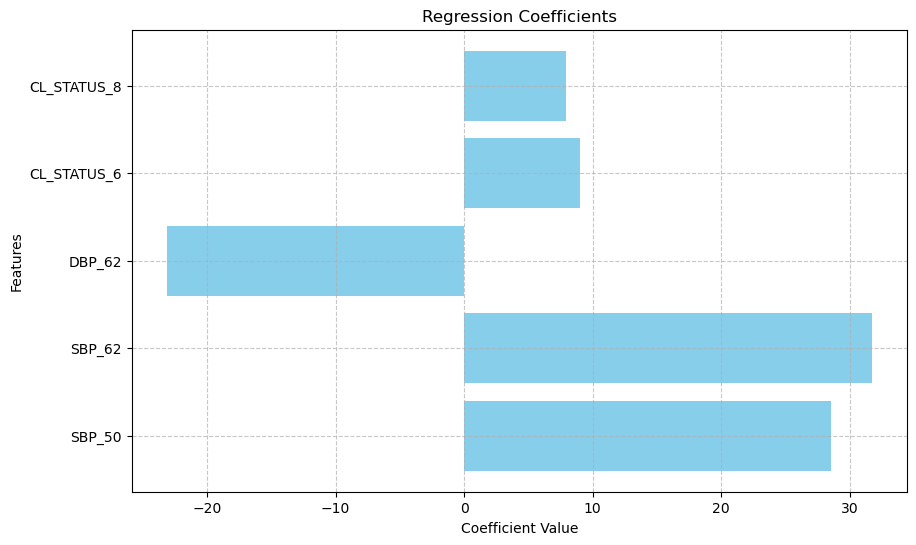

LinearRegression()

In [49]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)
model

На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [50]:
X_selected_rfe
print(X_selected_rfe.dtypes)

SBP_50         float64
SBP_62         float64
DBP_62         float64
CL_STATUS_6       bool
CL_STATUS_8       bool
dtype: object


In [51]:
numeric_features

['SBP_50',
 'DBP_50',
 'HT_50',
 'WT_50',
 'CHOL_50',
 'SBP_62',
 'DBP_62',
 'CHOL_62',
 'WT_62']

In [52]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


C:\Users\Thunderobot\AppData\Local\Temp\ipykernel_4940\2033120228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [53]:
X_selected_rfe

,SBP_50,SBP_62,DBP_62,CL_STATUS_6,CL_STATUS_8
0,0.180328,0.31250,0.318841,False,True
1,0.344262,0.32500,0.173913,True,False
2,0.262295,0.38750,0.492754,False,True
3,0.262295,0.30000,0.173913,False,True
4,0.245902,0.30000,0.000000,False,True
...,...,...,...,...,...
195,0.221311,0.28125,0.130435,False,True
196,0.180328,0.26250,0.289855,False,True
197,0.344262,0.37500,0.420290,False,False
198,0.426230,0.48750,0.463768,True,False


Regularization: None
Mean Absolute Error (MAE): 7.92
Mean Squared Error (MSE): 99.63
R^2 Score: -0.04


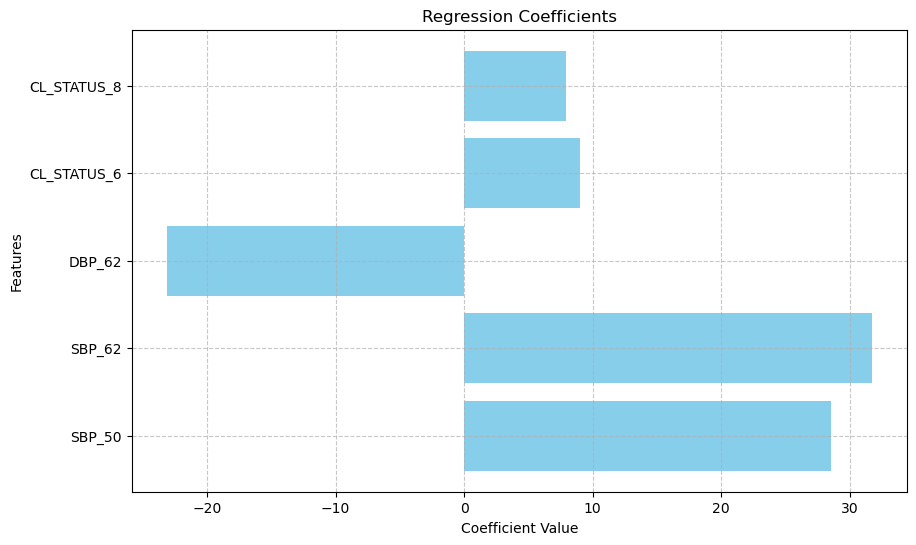

In [54]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [55]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 7.92
Mean Squared Error (MSE): 99.63
R^2 Score: -0.04


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [57]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110.0,65.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,1
1,1,130.0,72.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,1
2,2,120.0,90.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,1
3,4,120.0,80.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,1
4,3,118.0,74.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115.0,80.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,0
196,1,110.0,70.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,0
197,3,130.0,80.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,0
198,3,140.0,84.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,0


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 7.96
Mean Squared Error (MSE): 92.16
R^2 Score: 0.04


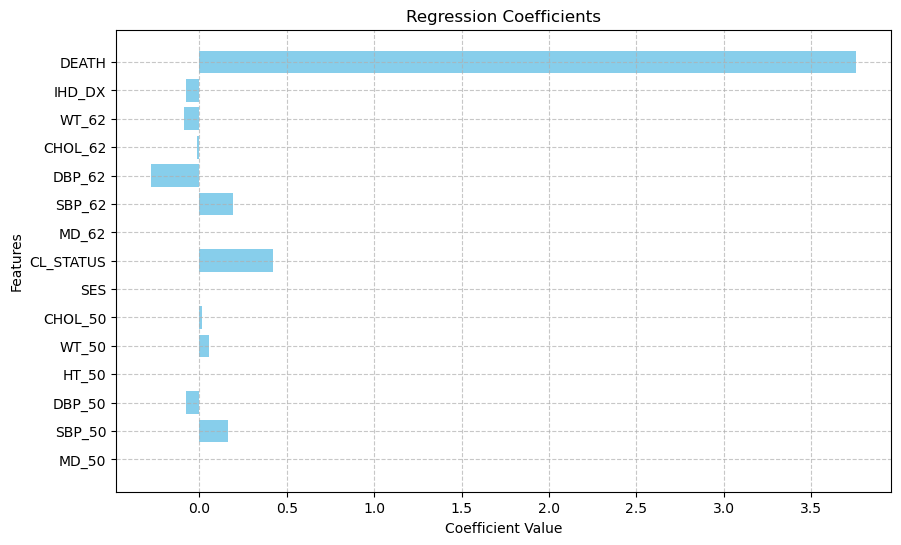

In [58]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 8.53
Mean Squared Error (MSE): 100.81
R^2 Score: -0.05


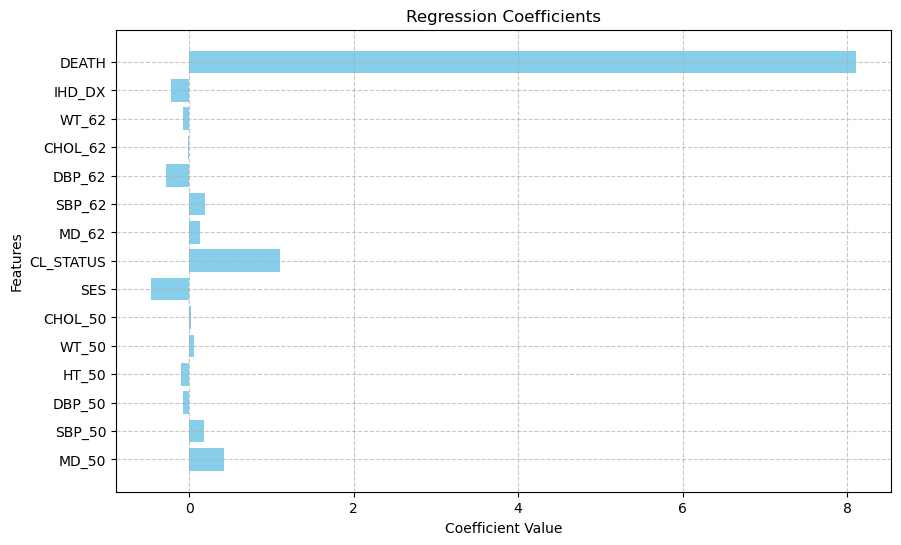

In [59]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 8.58
Mean Squared Error (MSE): 101.78
R^2 Score: -0.06


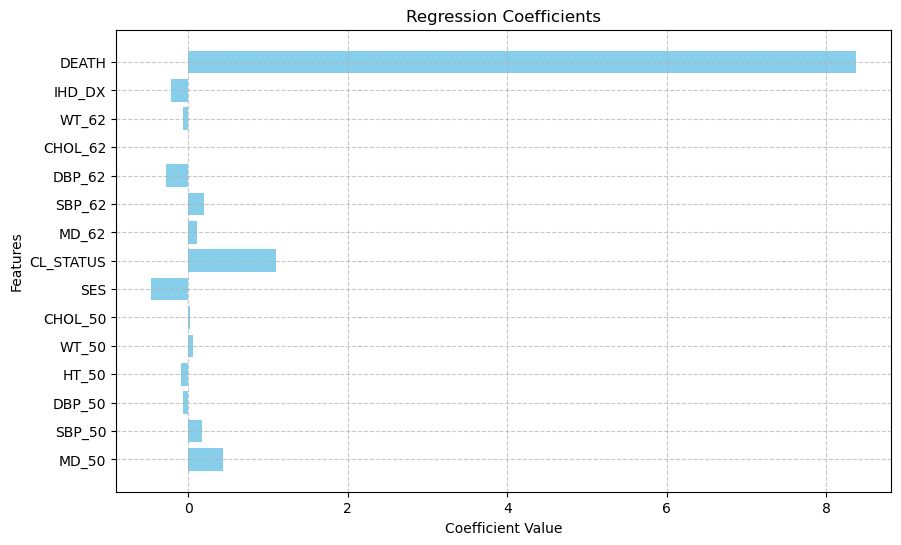

In [60]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
